In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq

    def generate_bpsk(self):
        bits = np.random.randint(0, 2, self.num_symbols)
        symbols = 2 * bits - 1  # Map 0 to -1 and 1 to 1
        return self.modulate(symbols), symbols, bits

    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        qpsk_map = {
            (0, 0): 1 + 1j, (0, 1): -1 + 1j,
            (1, 1): -1 - 1j, (1, 0): 1 - 1j
        }
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        return self.modulate(symbols), symbols, bits

    # Add methods for APSK modulation (omitted for brevity, you already have them)
    def generate_8apsk(self):
        return self._generate_apsk(8, 3, [1, 2.6], [1, 7])

    def generate_16apsk(self):
        return self._generate_apsk(16, 4, [1, 2.6], [4, 12])

    def generate_32apsk(self):
        return self._generate_apsk(32, 5, [1, 2.6, 4.15], [4, 12, 16])

    def generate_64apsk(self):
        return self._generate_apsk(64, 6, [1, 1.6, 2.4, 3.5], [4, 12, 20, 28])

    def generate_128apsk(self):
        return self._generate_apsk(128, 7, [1, 1.5, 2.2, 3.0, 3.8], [4, 12, 20, 40, 52])

    def generate_256apsk(self):
        return self._generate_apsk(256, 8, [1, 1.4, 1.9, 2.5, 3.2, 4.0], [4, 12, 20, 28, 60, 132])
    
    def _generate_apsk(self, m, bits_per_symbol, radii, points_per_ring):
        bits = np.random.randint(0, 2, bits_per_symbol * self.num_symbols)

        constellation = []
        for r, n in zip(radii, points_per_ring):
            for k in range(n):
                angle = 2 * np.pi * k / n
                constellation.append(r * np.exp(1j * angle))
        constellation = np.array(constellation)

        constellation /= np.sqrt(np.mean(np.abs(constellation)**2))

        symbols = np.zeros(self.num_symbols, dtype=complex)
        for i in range(self.num_symbols):
            bit_chunk = bits[i*bits_per_symbol:(i+1)*bits_per_symbol]
            symbol_index = int(''.join(map(str, bit_chunk)), 2)
            symbols[i] = constellation[symbol_index]

        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        signal = np.real(upsampled * carrier)
        return t, signal

    def add_noise(self, signal, snr_db):
        """ Add Gaussian noise to the signal based on the desired SNR in dB. """
        signal_power = np.mean(np.abs(signal)**2)
        snr_linear = 10 ** (snr_db / 10.0)
        noise_power = signal_power / snr_linear
        noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)
        noisy_signal = signal + noise
        return noisy_signal, noise

    def calculate_snr(self, signal, noise):
        """ Calculate the Signal-to-Noise Ratio (SNR) based on the signal and noise. """
        signal_power = np.mean(np.abs(signal)**2)
        noise_power = np.mean(np.abs(noise)**2)
        snr_linear = signal_power / noise_power
        snr_db = 10 * np.log10(snr_linear)
        return snr_db

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        """ Plot the signal for a limited number of symbols. """
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal with Noise (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

    def plot_constellation(self, symbols, modulation_type):
        """ Plot the constellation diagram. """
        plt.figure(figsize=(8, 8))
        plt.scatter(symbols.real, symbols.imag, c='r', alpha=0.5)
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()


BPSK - Calculated SNR: 5.00 dB
BPSK - First 10 symbols: [-1 -1 -1  1  1  1  1  1 -1  1]


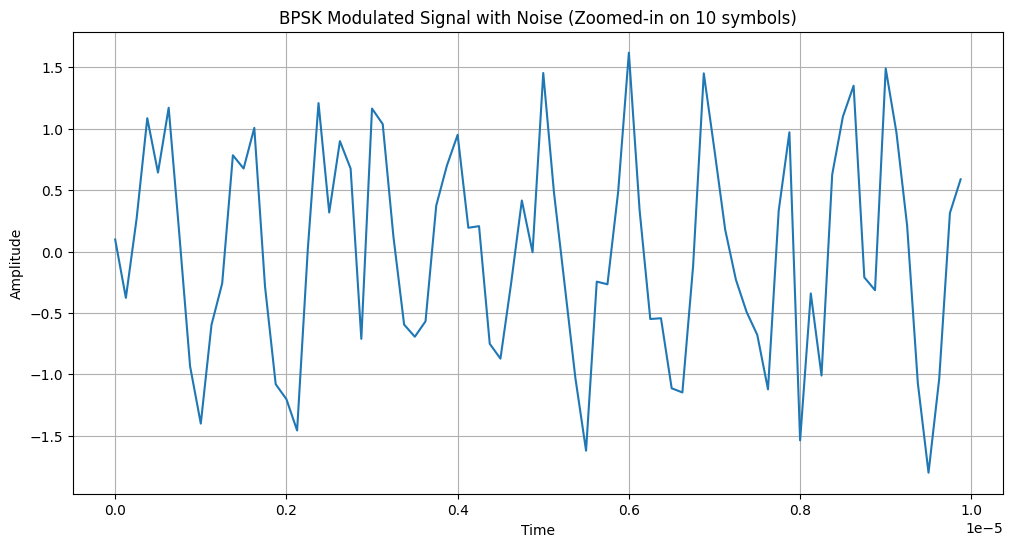


QPSK - Calculated SNR: 5.16 dB
QPSK - First 10 symbols: [ 1.-1.j  1.+1.j  1.-1.j  1.+1.j  1.+1.j -1.+1.j  1.+1.j -1.+1.j  1.+1.j
  1.+1.j]


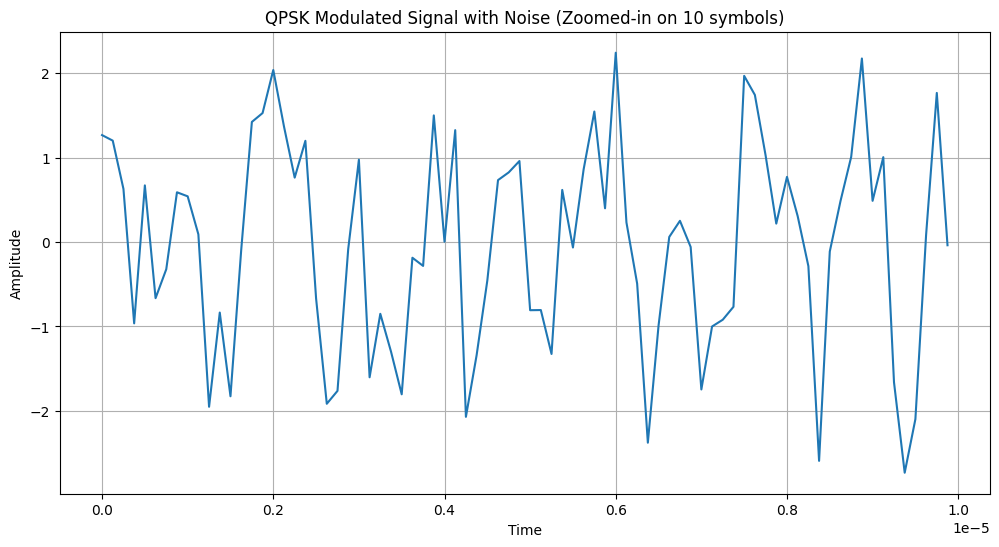


8-APSK - Calculated SNR: 4.89 dB
8-APSK - First 10 symbols: [ 0.65960545+0.82711907j -0.95315749-0.45901645j  1.057925  +0.j
 -0.23541046-1.03140061j  1.057925  +0.j         -0.23541046-1.03140061j
 -0.95315749-0.45901645j  0.40689423+0.j          0.40689423+0.j
  0.65960545-0.82711907j]


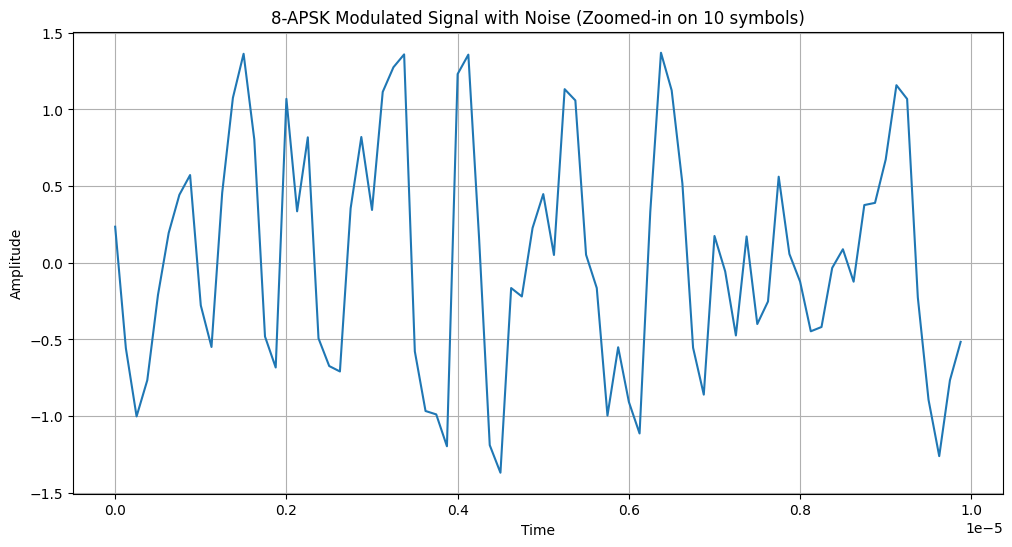


16-APSK - Calculated SNR: 5.14 dB
16-APSK - First 10 symbols: [ 4.33554985e-01+0.j         -5.63621480e-01-0.97622104j
  5.63621480e-01-0.97622104j  4.33554985e-01+0.j
  5.63621480e-01-0.97622104j  1.12724296e+00+0.j
  4.33554985e-01+0.j         -5.63621480e-01+0.97622104j
 -2.07071172e-16-1.12724296j  9.76221040e-01+0.56362148j]


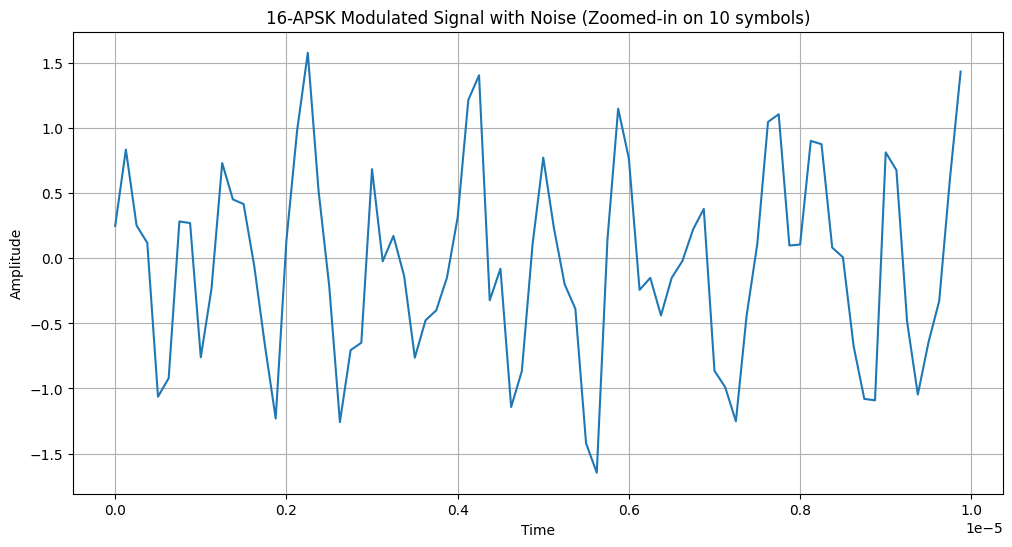


32-APSK - Calculated SNR: 5.08 dB
32-APSK - First 10 symbols: [ 0.47304419+1.14202971j  0.67068399+0.38721958j -0.38721958+0.67068399j
 -0.67068399+0.38721958j  1.23612405+0.j         -0.38721958+0.67068399j
  0.38721958+0.67068399j -1.14202971-0.47304419j  0.67068399+0.38721958j
  0.29786122+0.j        ]


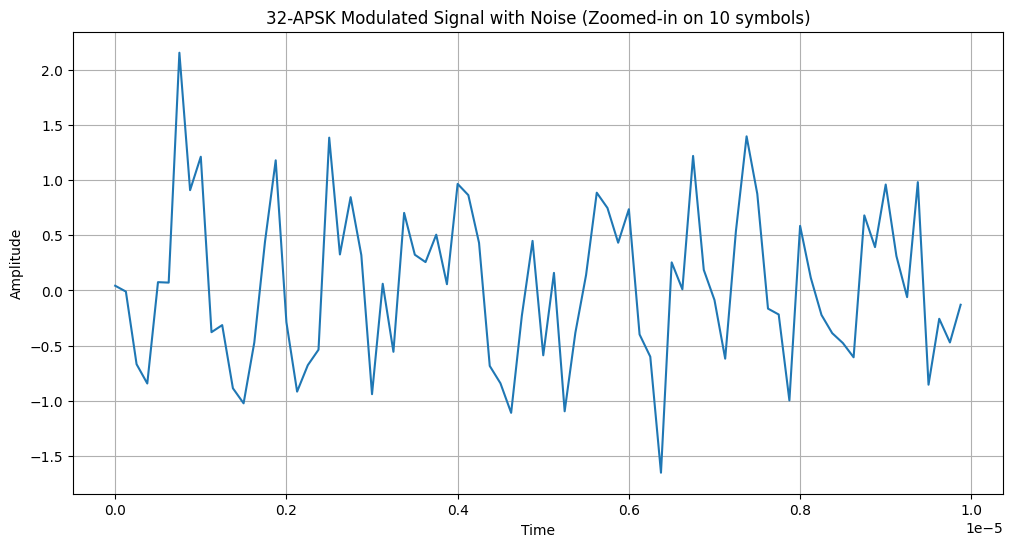


64-APSK - Calculated SNR: 5.07 dB
64-APSK - First 10 symbols: [ 1.13626491e+00-0.54719634j  1.22953902e+00+0.28063426j
 -2.31671133e-16-1.26115891j -2.80634258e-01-1.22953902j
 -9.86013738e-01+0.78631972j -1.05906804e-16-0.57652979j
  1.22953902e+00+0.28063426j  2.80634258e-01-1.22953902j
  8.22468615e-01-0.26723625j -4.99289441e-01+0.28826489j]


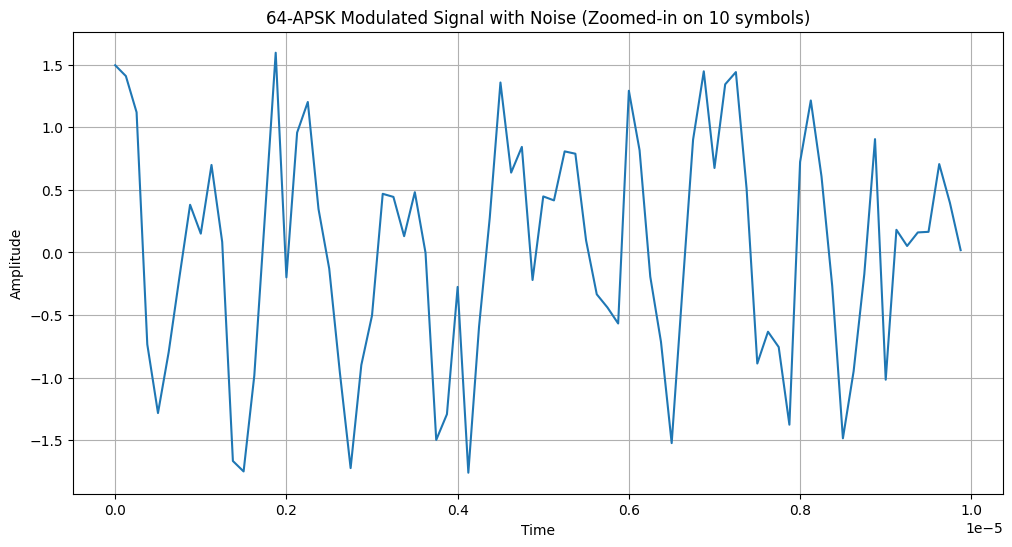


128-APSK - Calculated SNR: 4.87 dB
128-APSK - First 10 symbols: [ 1.96836792e-17+0.32145888j -1.47240826e-01-1.2126373j
  9.14338611e-01-0.81003333j  4.17587330e-01+0.24109416j
  1.22154373e+00+0.j         -8.10033325e-01+0.91433861j
 -9.52503552e-01-0.15086174j -9.14338611e-01-0.81003333j
  4.17587330e-01-0.24109416j -4.17587330e-01+0.24109416j]


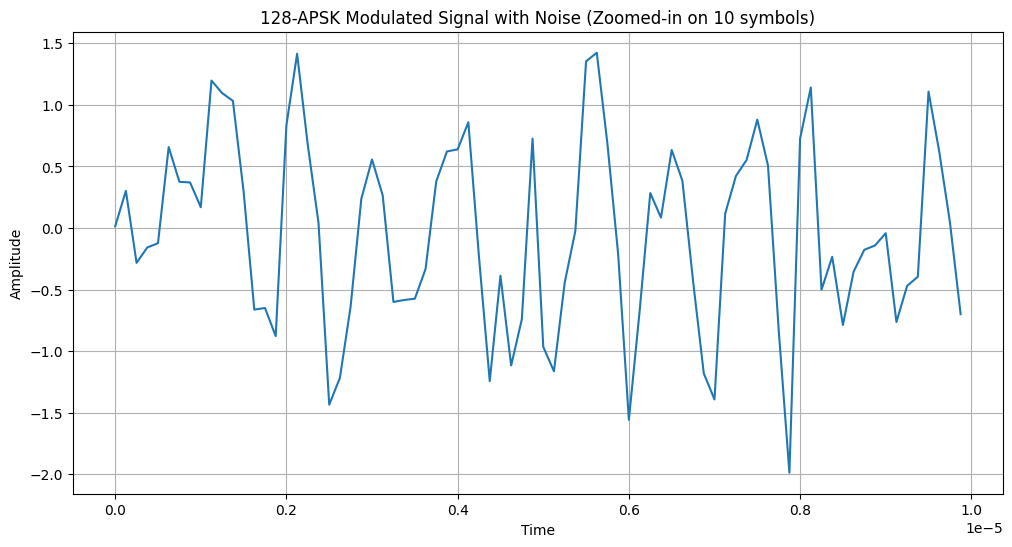


256-APSK - Calculated SNR: 4.91 dB
256-APSK - First 10 symbols: [-4.34197167e-01-1.08457209j  6.77655391e-01+0.95163384j
 -5.27762136e-01-0.17148031j  4.47094335e-17+0.73016046j
 -2.14605281e-16-1.16825674j -1.14714481e+00+0.22109404j
 -4.34197167e-01+1.08457209j  3.80138258e-01-0.85380451j
  8.09392009e-01+0.46730269j -6.94547158e-01+0.62537307j]


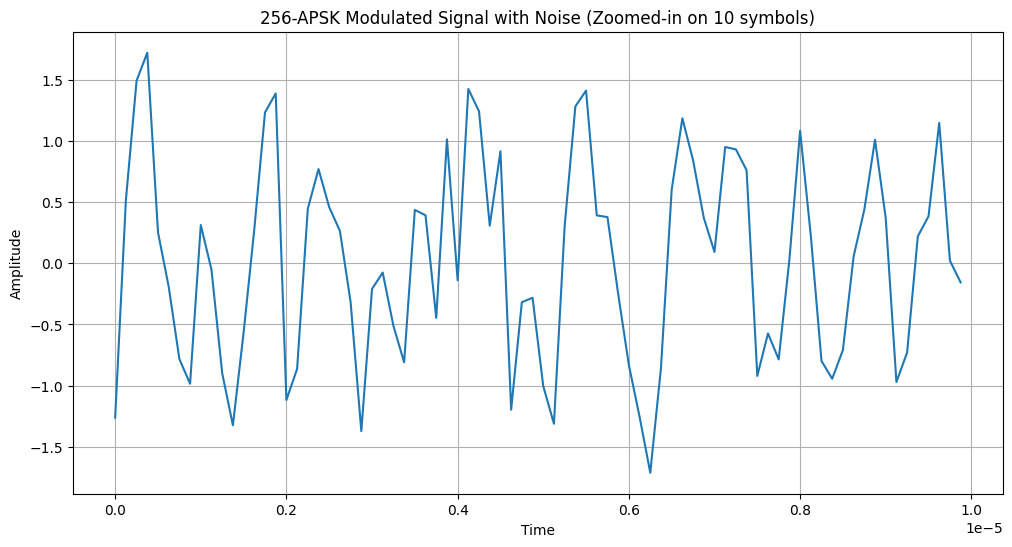

In [5]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)

# List of modulation schemes with associated functions
modulation_schemes = [
    ('BPSK', dvbs2x.generate_bpsk),
    ('QPSK', dvbs2x.generate_qpsk),
    ('8-APSK', dvbs2x.generate_8apsk),
    ('16-APSK', dvbs2x.generate_16apsk),
    ('32-APSK', dvbs2x.generate_32apsk),
    ('64-APSK', dvbs2x.generate_64apsk),
    ('128-APSK', dvbs2x.generate_128apsk),
    ('256-APSK', dvbs2x.generate_256apsk)
]

# SNR in dB
snr_db = 5

# Loop through each modulation scheme, add noise, and calculate SNR
for name, func in modulation_schemes:
    # Generate the modulated signal, symbols, and bits
    (t, signal), symbols, bits = func()

    # Add noise to the signal based on the specified SNR
    noisy_signal, noise = dvbs2x.add_noise(signal, snr_db)

    # Calculate the actual SNR after adding noise
    calculated_snr = dvbs2x.calculate_snr(signal, noise)
    print(f"\n{name} - Calculated SNR: {calculated_snr:.2f} dB")
    
    # Print the first 10 symbols
    print(f"{name} - First 10 symbols: {symbols[:10]}")
    
    # Plot the noisy signal
    dvbs2x.plot_signal(t, noisy_signal, name)

    # Optionally, plot the constellation diagram
    # dvbs2x.plot_constellation(symbols, name)

In [7]:
import numpy as np
import pandas as pd

# Create a DVBS2X object
dvbs2x = DVBS2X(num_symbols=100, samples_per_symbol=10, carrier_freq=1000)

# Define the modulation types
modulation_types = ['bpsk', 'qpsk', '8apsk', '16apsk', '32apsk', '64apsk', '128apsk', '256apsk']

# Create a list to store the features for each symbol
features_list = []

# Generate symbols for each modulation type
for modulation_type in modulation_types:
    if modulation_type == 'bpsk':
        _, symbols, bits = dvbs2x.generate_bpsk()
    elif modulation_type == 'qpsk':
        _, symbols, bits = dvbs2x.generate_qpsk()
    elif modulation_type == '8apsk':
        _, symbols, bits = dvbs2x.generate_8apsk()
    elif modulation_type == '16apsk':
        _, symbols, bits = dvbs2x.generate_16apsk()
    elif modulation_type == '32apsk':
        _, symbols, bits = dvbs2x.generate_32apsk()
    elif modulation_type == '64apsk':
        _, symbols, bits = dvbs2x.generate_64apsk()
    elif modulation_type == '128apsk':
        _, symbols, bits = dvbs2x.generate_128apsk()
    elif modulation_type == '256apsk':
        _, symbols, bits = dvbs2x.generate_256apsk()

    # Extract features for each symbol
    for i, symbol in enumerate(symbols):
        magnitude = np.abs(symbol)
        phase = np.angle(symbol)
        real = np.real(symbol)
        imag = np.imag(symbol)
        label = ''.join(map(str, bits[i:i+dvbs2x.num_symbols//len(symbols)]))

        # Create a dictionary to store the features for this symbol
        features = {
            'modulation_type': modulation_type,
            'symbol': symbol,
            'label': label,
            'magnitude': magnitude,
            'phase': phase,
            'real': real,
            'imag': imag
        }

        # Append the features to the list
        features_list.append(features)

# Create a pandas DataFrame from the list of features
df = pd.DataFrame(features_list)

# Print the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('symbol_features.csv', index=False)

    modulation_type              symbol label  magnitude     phase      real  \
795         256apsk -0.288809+0.888863j     0   0.934605  1.884956 -0.288809   
796         256apsk -0.288809-0.888863j     0   0.934605 -1.884956 -0.288809   
797         256apsk  0.677655-0.951634j     1   1.168257 -0.951998  0.677655   
798         256apsk  1.084572-0.434197j     0   1.168257 -0.380799  1.084572   
799         256apsk -0.527762+0.171480j     0   0.554922  2.827433 -0.527762   

         imag  
795  0.888863  
796 -0.888863  
797 -0.951634  
798 -0.434197  
799  0.171480  
